In [1]:
import numpy as np
import matplotlib.pyplot as plt
from discrete_events_simulation import Scenario, simulate #Import your solution from the previous lab.

# Statistical analysis
## Moving mean and variance

In [2]:
def moving_mean_var(new_data, old_mean, old_var, t):
    """ Calculates moving sample mean and variance at time t.
    
    Keywords:
        new_data (float): new data point arriving at time t.
        old_mean (float): previous sample mean.
        old_var (float): previous sample variance.
        t (int): time index
    
    Returns:
        new_mean (float): updated sample mean.
        new_var (float): updated sample variance.
    """
    new_mean = old_mean + (new_data - old_mean) / (t + 1)
    if t == 0:
        new_var = 0
    else:
        new_var = (1 - 1 / t) * old_var + (t + 1) * (new_mean - old_mean)**2
    return new_mean, new_var

## Queue simulation

In [3]:
seed = 1990
np.random.seed(seed)
k = 0
x_bar = 0
s = 0
x_bar_l = []
sigma_l = []
q_max_l = []
while True:
    t, q, _, _ = simulate(Scenario())
    q_max = np.max(q)
    q_max_l.append(q_max)
    x_bar, s = moving_mean_var(q_max, x_bar, s, k)
    x_bar_l.append(x_bar)
    sigma = np.sqrt(s)
    sigma_l.append(sigma)
    if k >= 100 and sigma / np.sqrt(k) < .1:
        break
    k += 1

Plot the mean maximum queue length and standard deviation

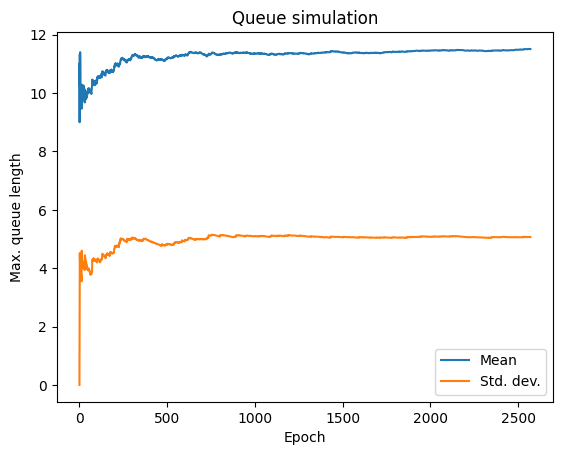

In [4]:
fig = plt.figure()
ax = plt.subplot(1, 1, 1)
plt.plot(x_bar_l, label='Mean')
plt.plot(sigma_l, label='Std. dev.')
ax.set(title='Queue simulation', xlabel='Epoch', ylabel='Max. queue length')
plt.legend()
#fig.savefig('figure_queue_simulation.pdf', dpi=300)
plt.show()

## Bootstrapping

In [5]:
def percentile(dataSorted, p=.95):
    i = max(int(round(p * len(dataSorted) + 0.5)), 2)
    return dataSorted[i - 2]

In [6]:
def bootstrap(data, f_statistic=percentile, draws=100):
    """ Calculates the bootstrap mse of a statistic of choice
    
    Keywords:
        data (array): data array.
        f_statistic: function handle calculating the statistic of interest.
        draws (int): number of bootstrap draws.
    
    Returns:
        mse (float): mean square error of the statistic of interest.
    """
    data.sort()
    n = len(data)
    stat = f_statistic(data)
    mse = 0.0
    for l in range(0, draws):
        b = []
        for i in range(0, n):
            r = np.random.random()
            index = int(n * r)
            b.append(data[index])
        b.sort()
        stat_hat = f_statistic(b)
        mse += (stat - stat_hat)**2
    mse /= draws
    return mse

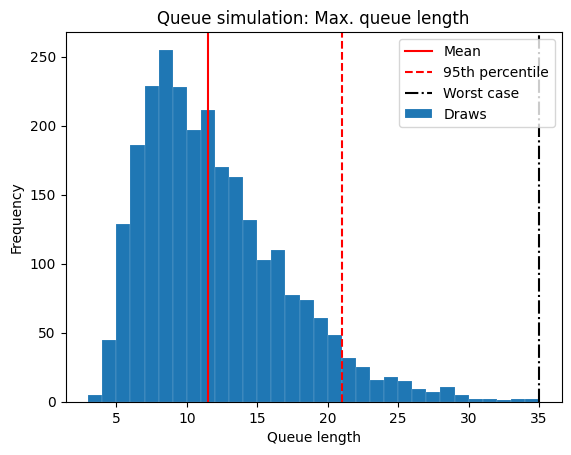

In [7]:
fig = plt.figure()
ax = plt.subplot(1, 1, 1)
ax.set(title='Queue simulation: Max. queue length',
       xlabel='Queue length',
       ylabel='Frequency')
ax.axvline(np.mean(q_max_l), color='r', ls='-', label='Mean')
ax.axvline(percentile(np.sort(q_max_l)), color='r', ls='--', label='95th percentile')
ax.axvline(np.max(q_max_l), color='k', ls='-.', label='Worst case')
plt.hist(q_max_l, bins=32, label='Draws', ec='w', lw=.1)
plt.legend(loc='best')
plt.show()

In [8]:
np.random.seed(seed)
stat = np.mean(np.sort(q_max_l))
bootstrap_mse = bootstrap(q_max_l, f_statistic=np.mean)
print(f'Mean: {stat:.1f}')
print(f'MSE: {bootstrap_mse:.4f}')

Mean: 11.5
MSE: 0.0091


In [9]:
np.random.seed(seed)
stat = percentile(np.sort(q_max_l))
bootstrap_mse = bootstrap(q_max_l, f_statistic=percentile)
print(f'95th percentile: {stat:.1f}')
print(f'MSE: {bootstrap_mse:.2f}')

95th percentile: 21.0
MSE: 0.17


In [10]:
np.random.seed(seed)
stat = np.max(np.sort(q_max_l))
bootstrap_mse = bootstrap(q_max_l, f_statistic=np.max)
print(f'Worst case: {stat:.1f}')
print(f'MSE: {bootstrap_mse:.2f}')

Worst case: 35.0
MSE: 1.25
